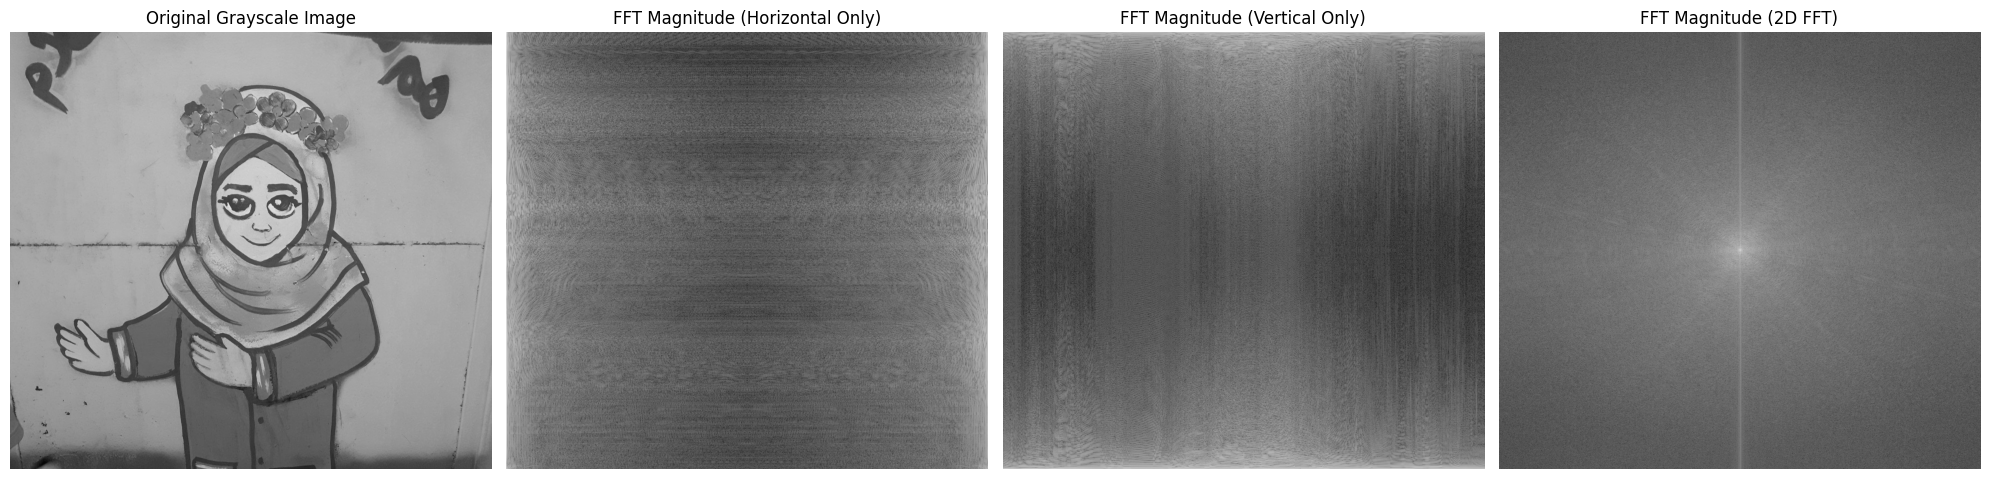

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.fft import fft, fft2, fftshift

# Load the image
img = imread('pic.jpg')

# Convert to grayscale if RGB
if img.ndim == 3:
    img_gray = np.mean(img, axis=2)
else:
    img_gray = img

# Horizontal FFT (1D FFT across rows)
fft_horizontal = fft(img_gray, axis=1)
mag_horizontal = np.log(1 + np.abs(fft_horizontal))

# Vertical FFT (1D FFT down columns)
fft_vertical = fft(img_gray, axis=0)
mag_vertical = np.log(1 + np.abs(fft_vertical))

# Full 2D FFT (horizontal + vertical)
fft_2d = fft2(img_gray)
mag_2d = np.log(1 + np.abs(fftshift(fft_2d)))  # shift for center visualization

# Plotting all results
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mag_horizontal, cmap='gray')
plt.title("FFT Magnitude (Horizontal Only)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mag_vertical, cmap='gray')
plt.title("FFT Magnitude (Vertical Only)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(mag_2d, cmap='gray')
plt.title("FFT Magnitude (2D FFT)")
plt.axis('off')

plt.tight_layout()
plt.show()


## Let US Expriment how FFT inverse works

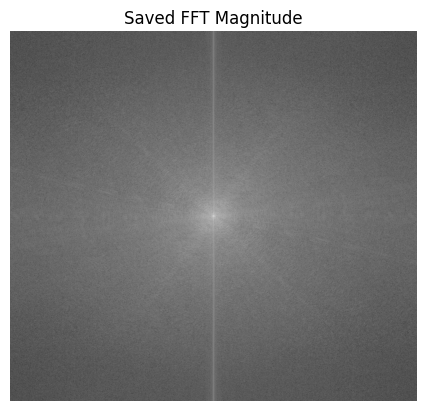

In [2]:
# part1_save_fft_components.py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.fft import fft2, fftshift
import imageio.v2 as imageio

# Load and grayscale image
img = imread('pic.jpg')
if img.ndim == 3:
    img_gray = np.mean(img, axis=2)
else:
    img_gray = img

# Apply 2D FFT
fft_result = fft2(img_gray)

# Compute magnitude and phase
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Save log-magnitude image for visualization
log_magnitude = np.log1p(fftshift(magnitude))
log_mag_norm = 255 * (log_magnitude - log_magnitude.min()) / (log_magnitude.max() - log_magnitude.min())
log_mag_uint8 = log_mag_norm.astype(np.uint8)
imageio.imwrite('magnitude.jpg', log_mag_uint8)

# Save raw magnitude and phase as .npy for accurate reconstruction
np.save('magnitude.npy', magnitude)
np.save('phase.npy', phase)

# Display magnitude for reference
plt.imshow(log_mag_uint8, cmap='gray')
plt.title("Saved FFT Magnitude")
plt.axis('off')
plt.show()


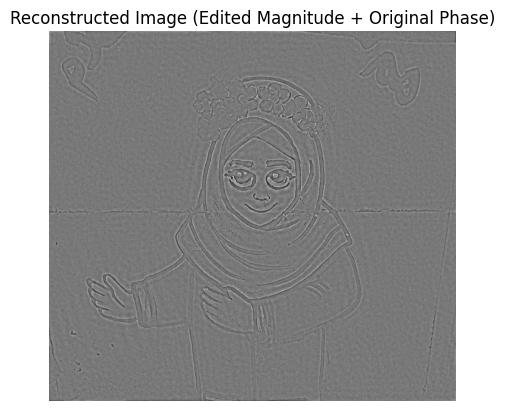

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.transform import resize
from numpy.fft import ifft2, ifftshift

# Load and preprocess magnitude.jpg
# I changed the magnitude to Sample1_Changed_magnitude.jpg and load it here as magnitude.jpg to see the effect after FFT inverse
mag_img = imageio.imread('magnitude.jpg').astype(np.float32)

# Convert RGB to grayscale if needed
if mag_img.ndim == 3:
    mag_img = np.mean(mag_img, axis=2)

# Load phase
phase = np.load('phase.npy')

# Resize magnitude to match phase shape
mag_img_resized = resize(mag_img, phase.shape, anti_aliasing=True)

# Rescale log1p magnitude (educational guesswork if edited)
log_mag = mag_img_resized / mag_img_resized.max() * 10  # arbitrary scaling factor
magnitude = np.expm1(log_mag)  # approximate inverse of log1p
magnitude = ifftshift(magnitude)

# Recombine and inverse FFT
fft_complex = magnitude * np.exp(1j * phase)
reconstructed = np.real(ifft2(fft_complex))

# Normalize to [0, 255]
reconstructed_norm = 255 * (reconstructed - reconstructed.min()) / (reconstructed.max() - reconstructed.min())
reconstructed_uint8 = reconstructed_norm.astype(np.uint8)

# Show and save
plt.imshow(reconstructed_uint8, cmap='gray')
plt.title("Reconstructed Image (Edited Magnitude + Original Phase)")
plt.axis('off')
plt.show()

imageio.imwrite('reconstructed_from_edited_magnitude.jpg', reconstructed_uint8)
